# 檔案處理 課本chapter05
* 在檔案中開啟及關閉檔案
* 檔案的讀取及寫入
* 尋找及移動讀取位置


###檔案與目錄管理

In [39]:
#可以先知道一下現在的工作目錄
import os
print(os.getcwd())
print(os.path.dirname("myDir"))

/content



In [40]:
#os.remove() 刪除指定的檔案
import os
file='myfile.txt'
if os.path.exists(file):
  os.remove(file)
  print('檔案刪除')
else:
  print('無此檔案')

無此檔案


In [41]:
#mkdir()建立目錄
import os
dir1="myDir2"
if not os.path.exists(dir1):
  os.mkdir(dir1)
  print('建立新資料夾'+dir1)
else:
  print(dir1+'已存在')

建立新資料夾myDir2


In [42]:
#rmdir()刪除目錄
import os
dir1="myDir2"
if os.path.exists(dir1):
  os.rmdir(dir1)
  print('刪除資料夾'+dir1)
else:
  print(dir1+'不存在')

刪除資料夾myDir2


### 相關的檔案管理os.path,os.walk(), shutil,glob 用法 請參閱課本p 5-4~5-8

---



##檔案處理 File 
課本p 5-9

In [25]:
#open()開啟檔案語法
#開啟檔案，此時變數 f 被 assign 的是一個 file object
f = open('test.txt', mode='w')
''' 
“r” 唯讀模式：當我們以 mode 為 “r” 開啟檔案時，意即我們只能從指定的檔案讀取資料，並不能夠對這個檔案的內容進行更動。與此同時，如果我們所指定的檔案不存在，將會產生 FileNotFoundError 的例外。
“w” 寫入模式（覆寫）：而如果我們以 “w” 為開啟檔案的模式時，意即要來進行檔案的寫入，會在開啟的位置直接覆蓋掉原本的檔案。如果我們所指定的檔案路徑/名稱不存在，會新增一個新的檔案。
“a” 寫入模式（續寫）：但若我們設定開啟檔案的模式為 “a”，是指在此模式下開啟檔案要進行寫入時，會從原本的檔案最後繼續進行寫入。
'''
#寫入檔案
f.write("hello kitty")
#關閉檔案
f.close()


In [26]:
#開啟檔案
f=open('test.txt',mode='r')
#讀取檔案
word=f.read()
print(word)
#關閉檔案
f.close()


hello kitty


In [27]:
f=open('test.txt',mode='r')
#寫入檔案（字數）
word=f.read(3)
print(word)
f.close()

hel


In [28]:
#開啟檔案
f = open('test.txt', mode='w')
#寫入檔案（兩行）
f.write('write two line this is first line \nthis is second line')
f.close()

In [29]:
f=open('test.txt', mode='r')
#讀取檔案（單行）
line1=f.readline()
line2=f.readline()
f.close()
print (line1)
print(line2)

write two line this is first line 

this is second line


In [30]:
f=open('test.txt', mode='r')
#讀取檔案（多行，視為list）
k=f.readlines()
f.close()
print (k)

['write two line this is first line \n', 'this is second line']


In [31]:
for i in k:
  print(i)

write two line this is first line 

this is second line


In [32]:
#整合上面兩個
f=open('test.txt', mode='r')
#讀取檔案（多行，視為list）
for i in f.readlines():
  print(i)
f.close()


write two line this is first line 

this is second line


In [33]:
#簡化指令
f=open('test.txt', mode='r')
for line in f:
  print(line)
f.close()

write two line this is first line 

this is second line


In [34]:
#f.seek()
#f.tell()

In [35]:
#寫入名字與學號：寫入名字
name=['eric','sam','cherry','mary']
stid=['s0123','s0144','s0135','s0212']
f=open('stid.txt',mode='w')
for i in name:
  f.write(i+'\t')
f.close()

In [36]:
#寫入名字與學號：寫入名字＋學號
name=['eric','sam','cherry','mary']
stid=['s0123','s0144','s0135','s0212']
f=open('stid.txt',mode='w')
for i in name:
  f.write(i+'\t'+stid[name.index(i)]+'\n')
f.close()

In [37]:
#計算檔案行數
f = open('stid.txt')
totallines = len(f.readlines()) 
print ("There are %d lines in file" % totallines) 

There are 4 lines in file


##相關檔案處理的方法 課本p5-11

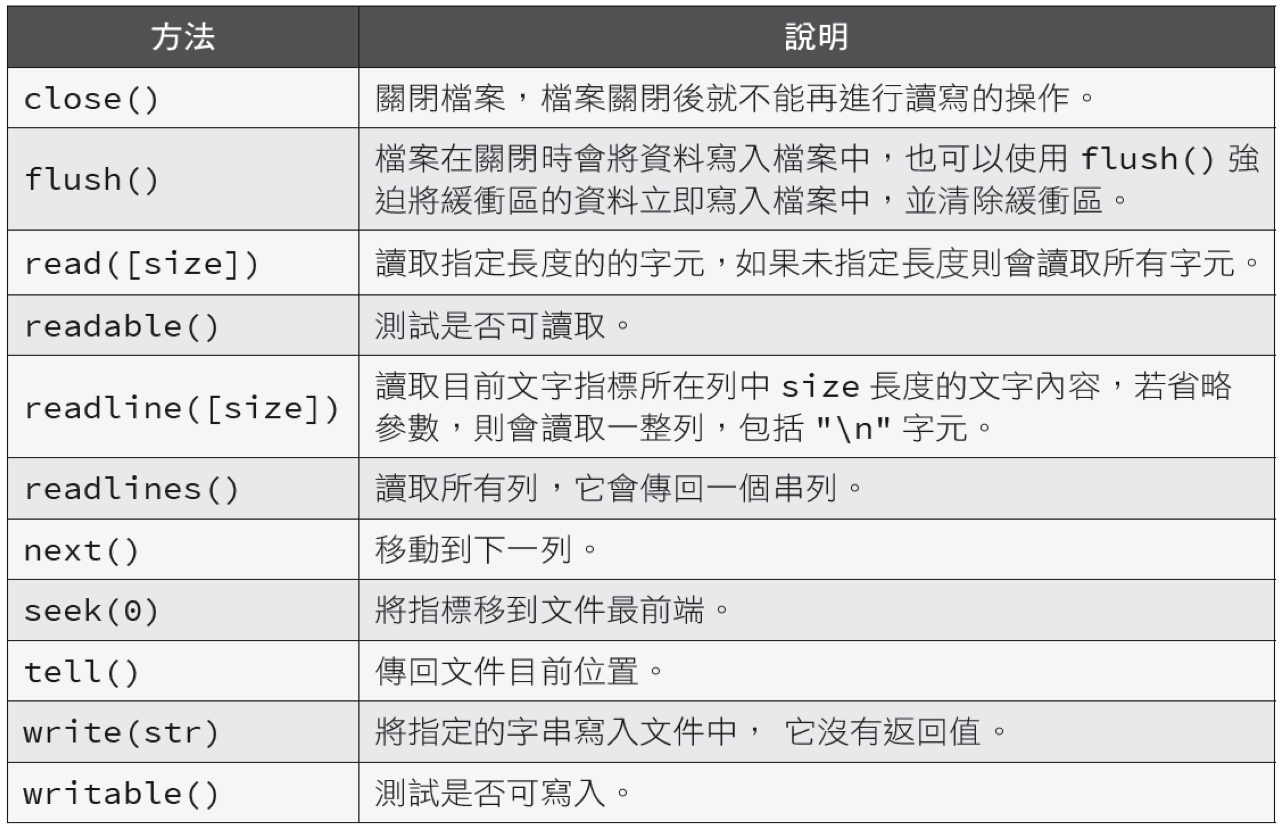

#另一種用法
## with open() as f:


In [38]:
with open('test.txt', 'w') as f:
    f.write('Hello, python!\n')
    f.write('This a book')
with open('test.txt', 'r') as f:
    print(f.read())
# 程式碼更佳簡潔，並且不必呼叫f.close()方法。

Hello, python!
This a book


# 讀寫檔案儘量使用with open語句，少使用f = open()語句

In [20]:
#寫入名字與學號：寫入名字
name=['eric','sam','cherry','mary']
stid=['s0123','s0144','s0135','s0212']
with open('stid.txt',mode='w') as f:
  for i in name:
    f.write(i+'\t')

In [22]:
#寫入名字與學號：寫入名字＋學號
name=['eric','sam','cherry','mary']
stid=['s0123','s0144','s0135','s0212']
with open ('stid2.txt',mode='w') as f:
  for i in name:
    f.write(i+'\t'+stid[name.index(i)]+'\n')

In [23]:
#計算檔案行數
with open('stid2.txt') as f:
  totallines = len(f.readlines()) 
  print ("There are %d lines in file" % totallines) 

There are 4 lines in file


In [25]:
#尋找keyword資料 測試程式 暫放
with open('stid2.txt') as f:
    keywords = ['s0135']
    for line in f:
        new_line = line.strip().split()
        for word in new_line:
          #print(word)
          if word in keywords:
            print(line)
            break
          #else:
           # print(keywords[0]+"not in file")

cherry	s0135



#例外處理
## try....except...else....finally
課本 p5-14~
請先自行找資料 測試 理解
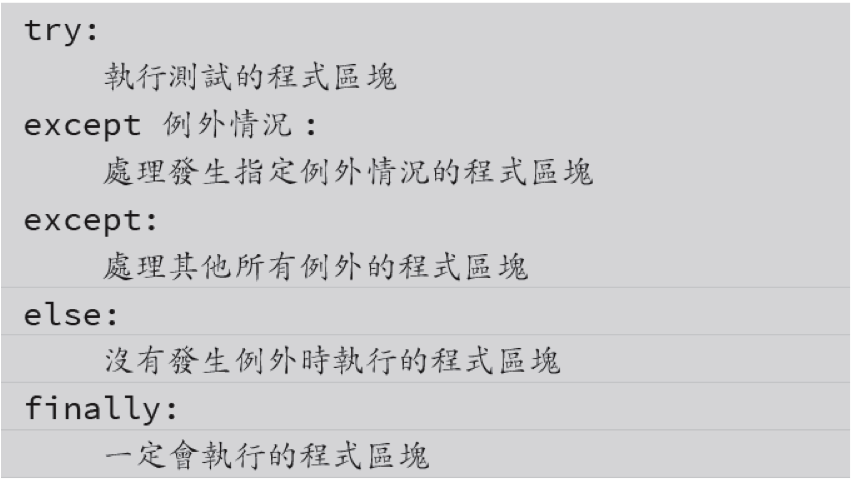